In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1259,2020-08-09,United Kingdom,310122.0,309763.0,46605.0,46566.0,359.0,39.0
1260,2020-08-09,Germany,216401.0,215891.0,9208.0,9196.0,510.0,12.0
1261,2020-08-09,Iran,326360.0,324692.0,18271.0,18264.0,1668.0,7.0
1262,2020-08-09,Turkey,239483.0,239622.0,5826.0,5829.0,-139.0,-3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4565.916930379747
RMSE =  16027.031342969061


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  286.11787974683546
RMSE =  679.1087263344098


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  27844.454545454544
RMSE =  48846.250509309124
-- World performances for deaths --
MAE =  1543.2231404958677
RMSE =  1889.3600342028449


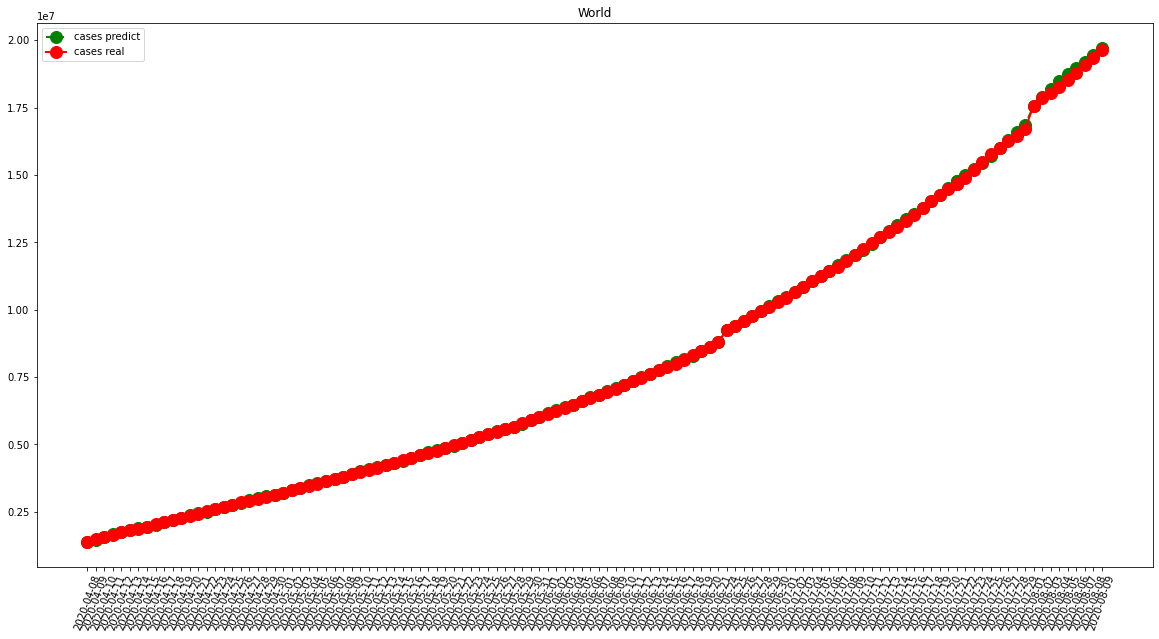

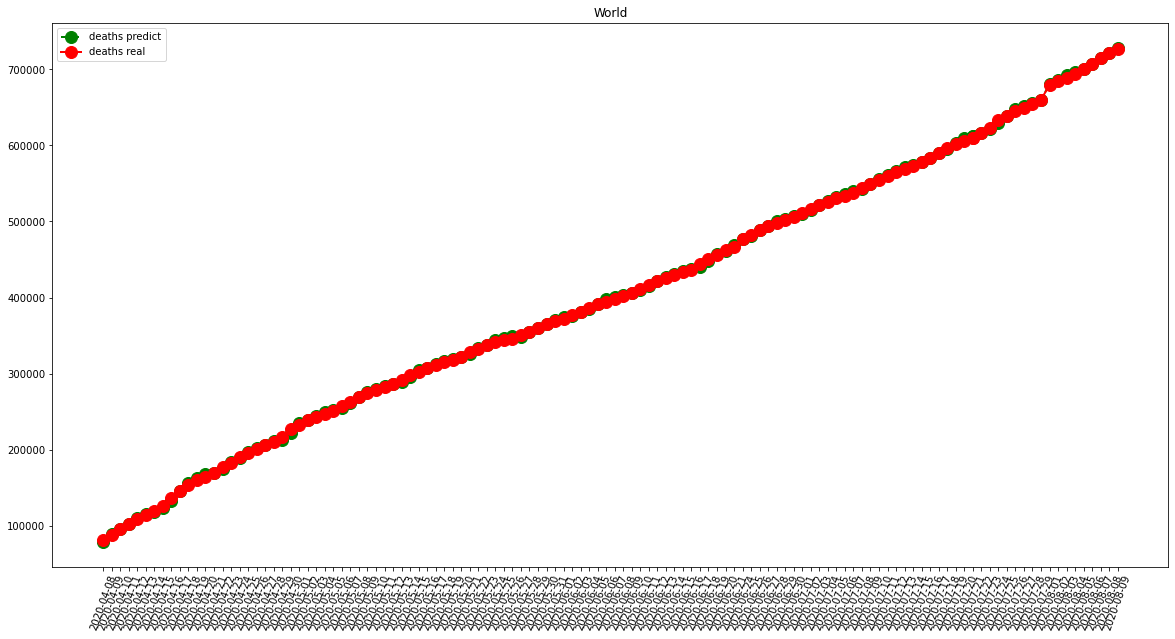

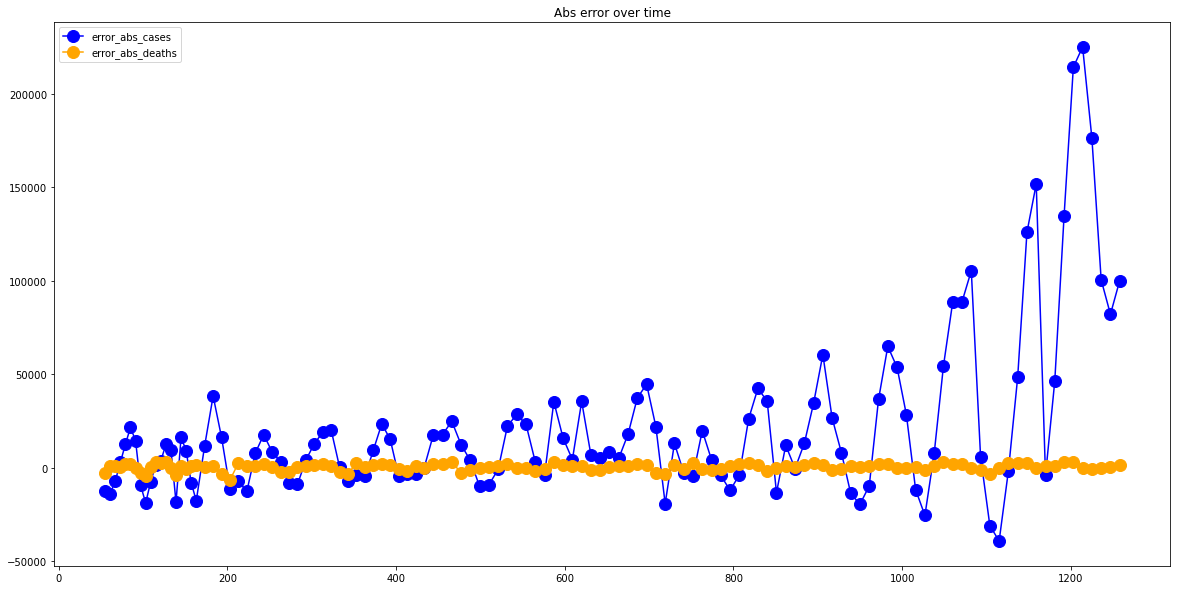

In [7]:
visShow("World")

-- France performances for cases --
MAE =  875.1908396946565
RMSE =  1374.4083251620712
-- France performances for deaths --
MAE =  139.3740458015267
RMSE =  292.90505978183705


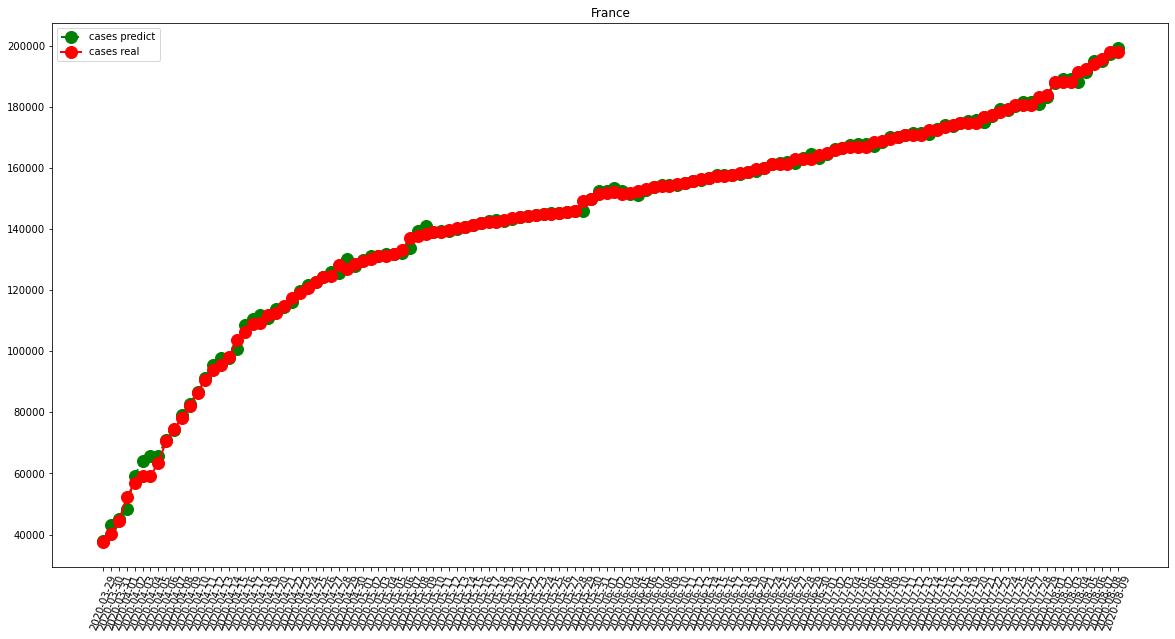

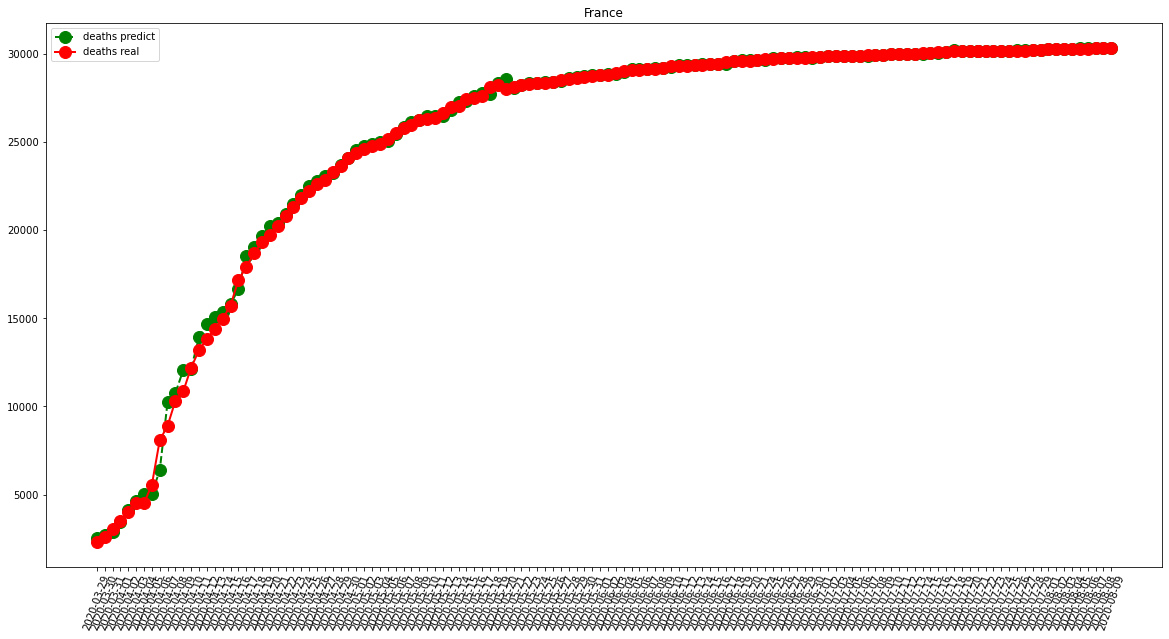

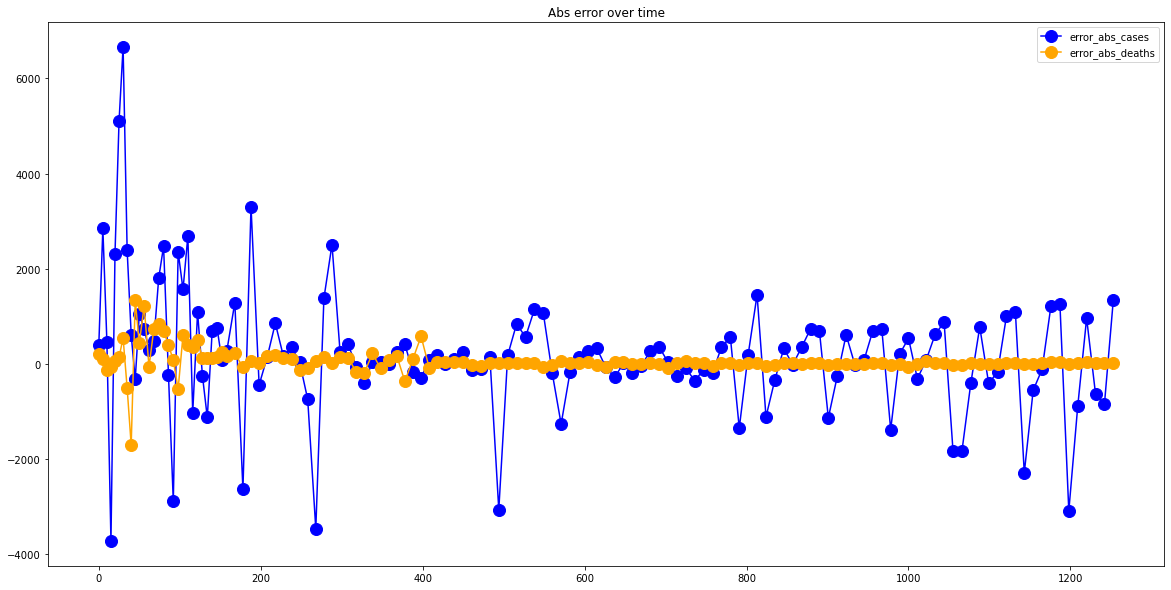

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  315.206106870229
RMSE =  479.22794143009673
-- Italy performances for deaths --
MAE =  79.91603053435115
RMSE =  258.644396158359


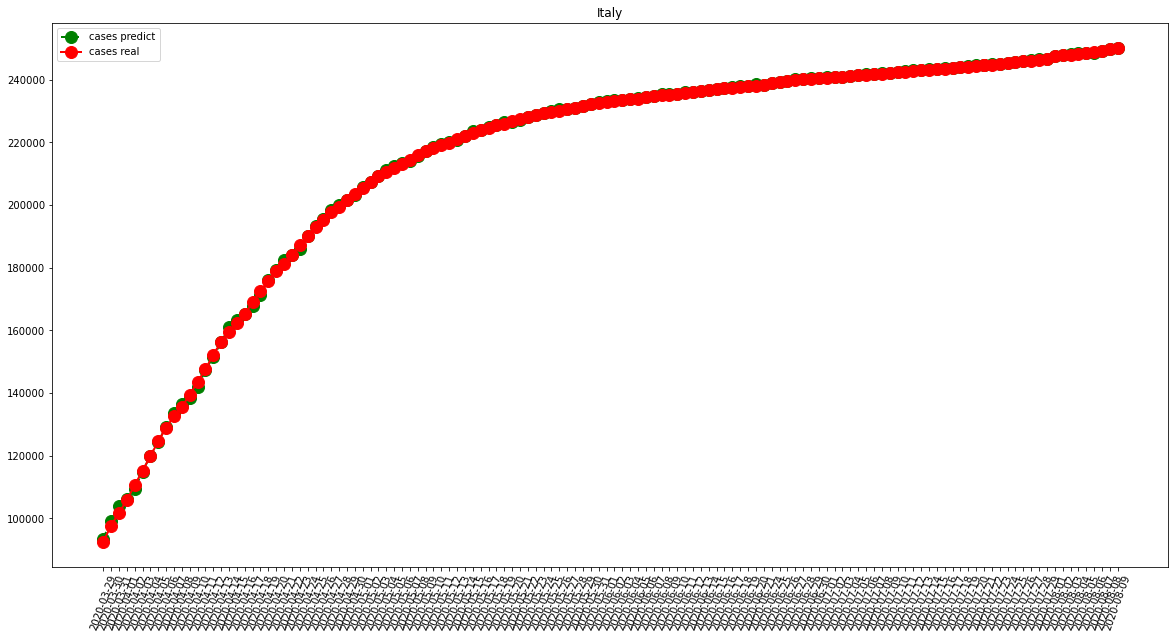

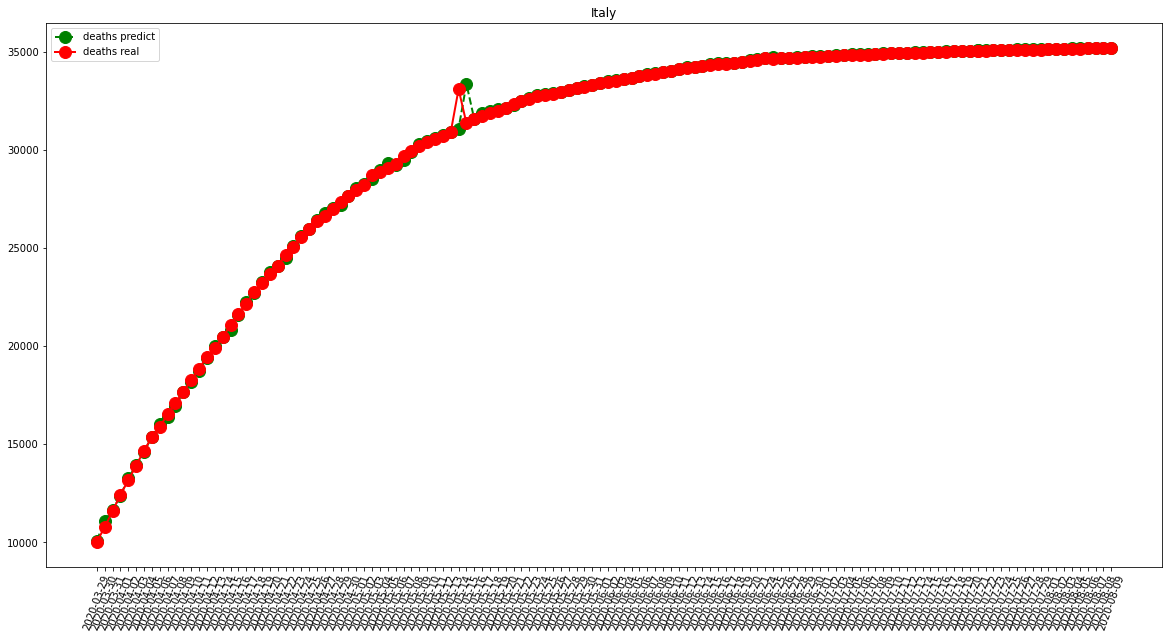

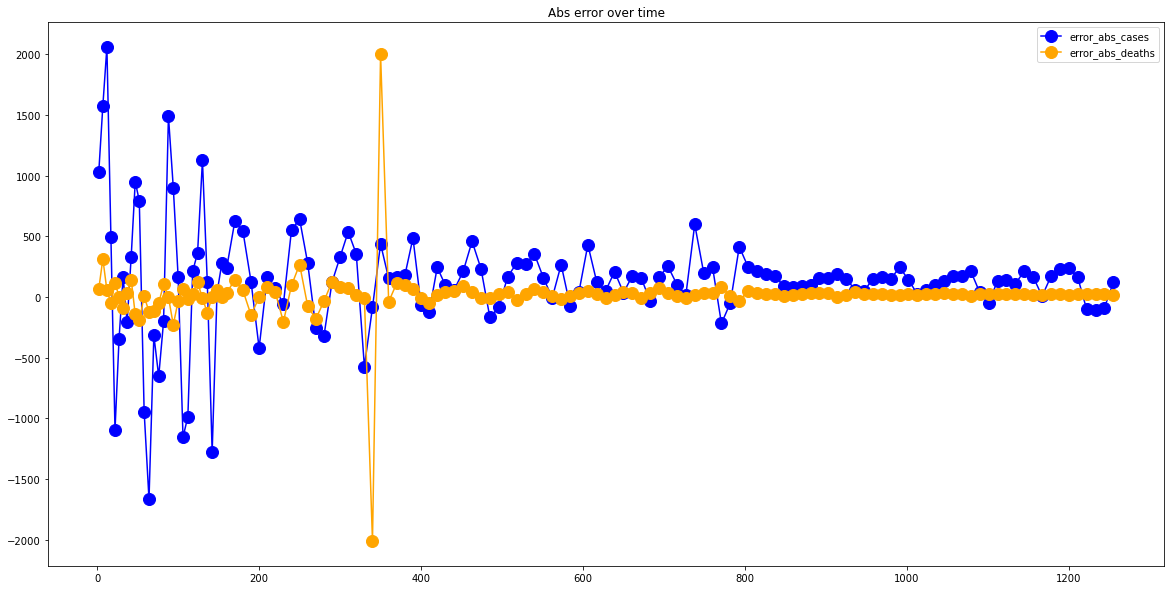

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1176.2519083969466
RMSE =  2287.3229043364845
-- Spain performances for deaths --
MAE =  141.49618320610688
RMSE =  354.6839900875531


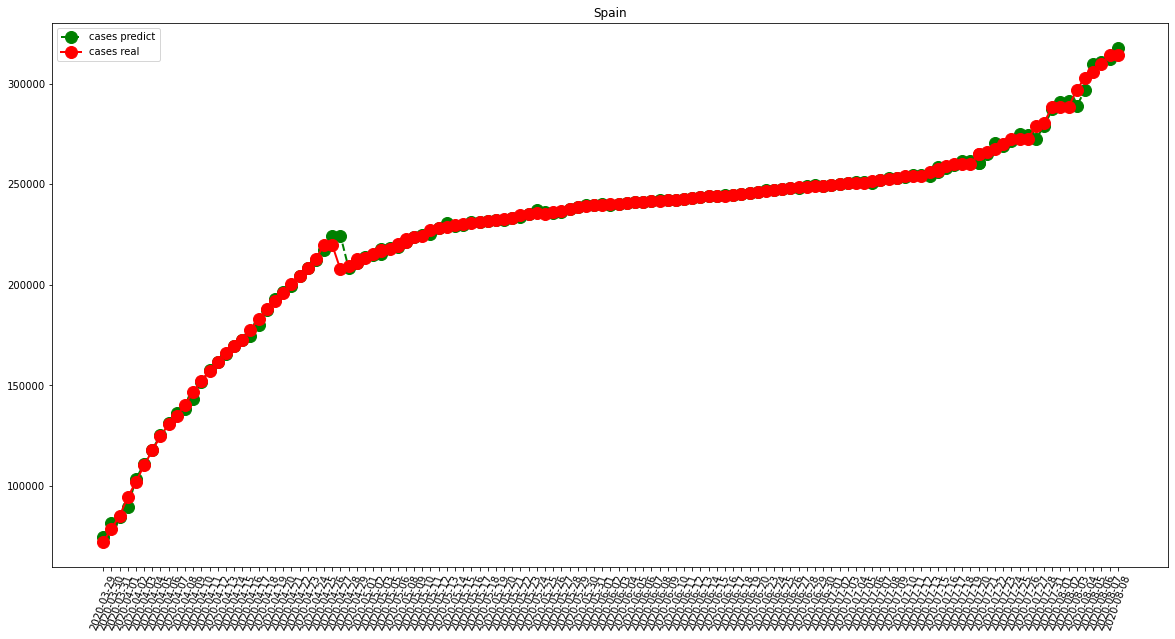

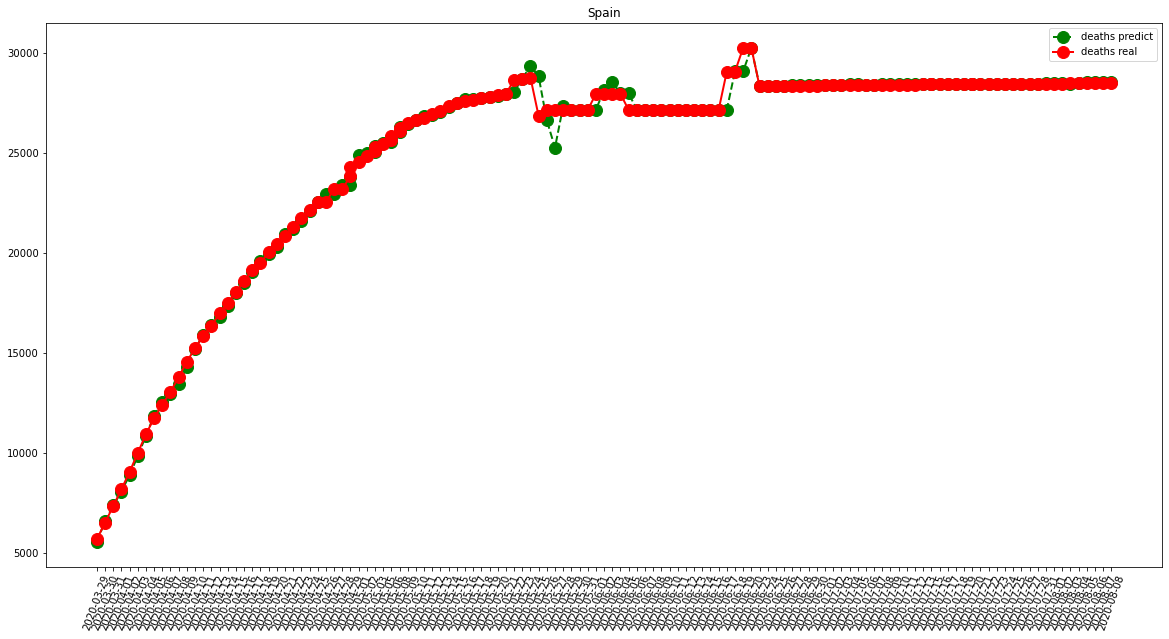

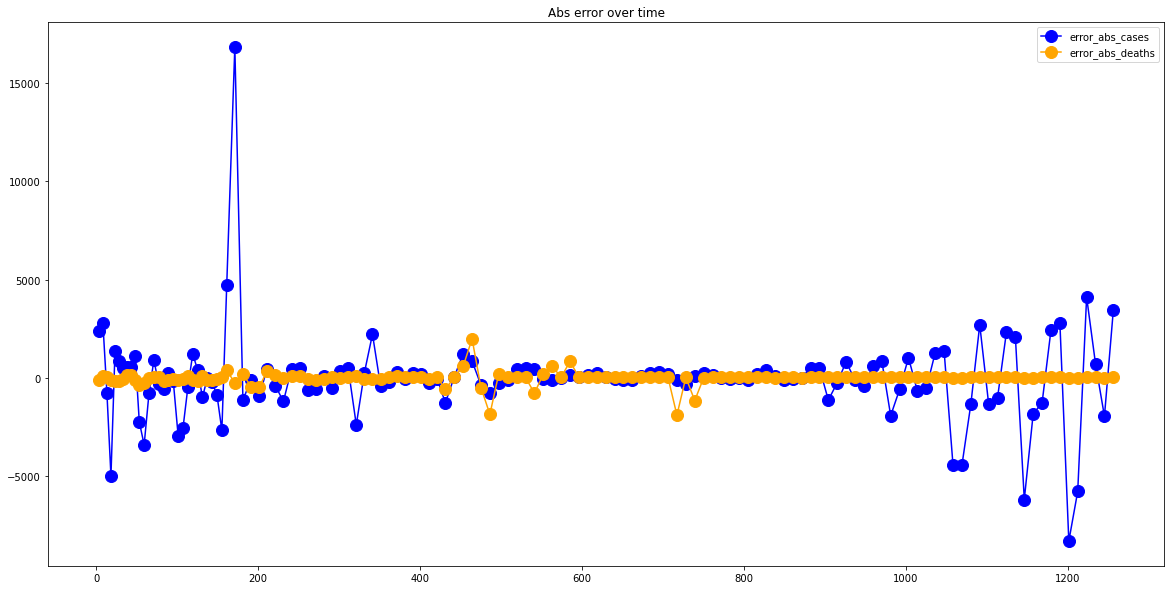

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  7140.229007633588
RMSE =  10331.436156383832
-- United States performances for deaths --
MAE =  502.5648854961832
RMSE =  719.1722977792803


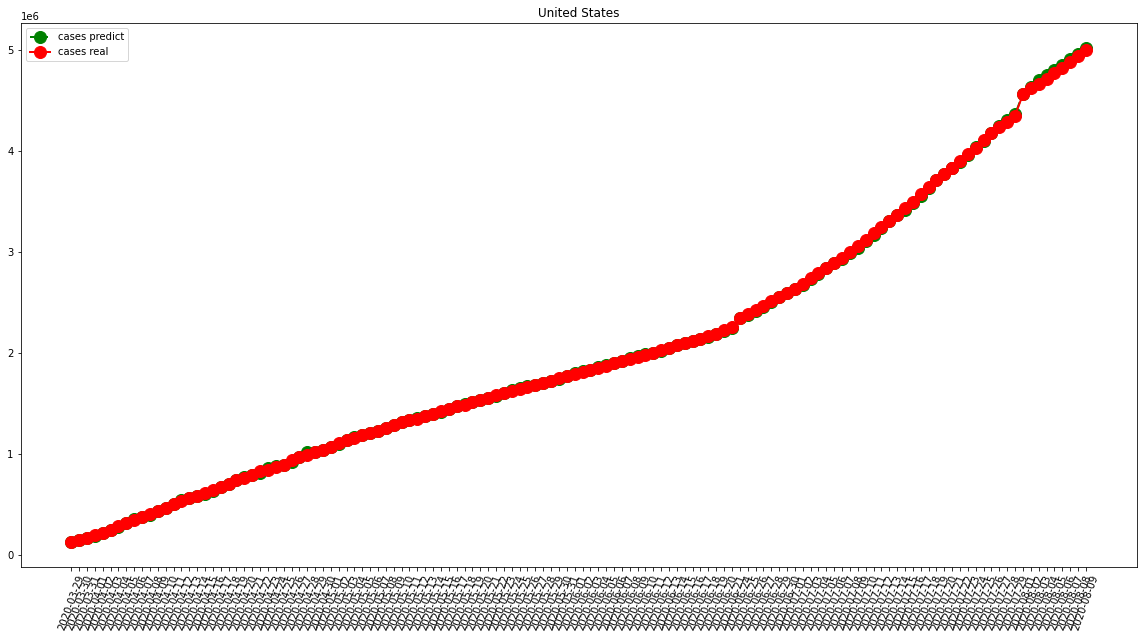

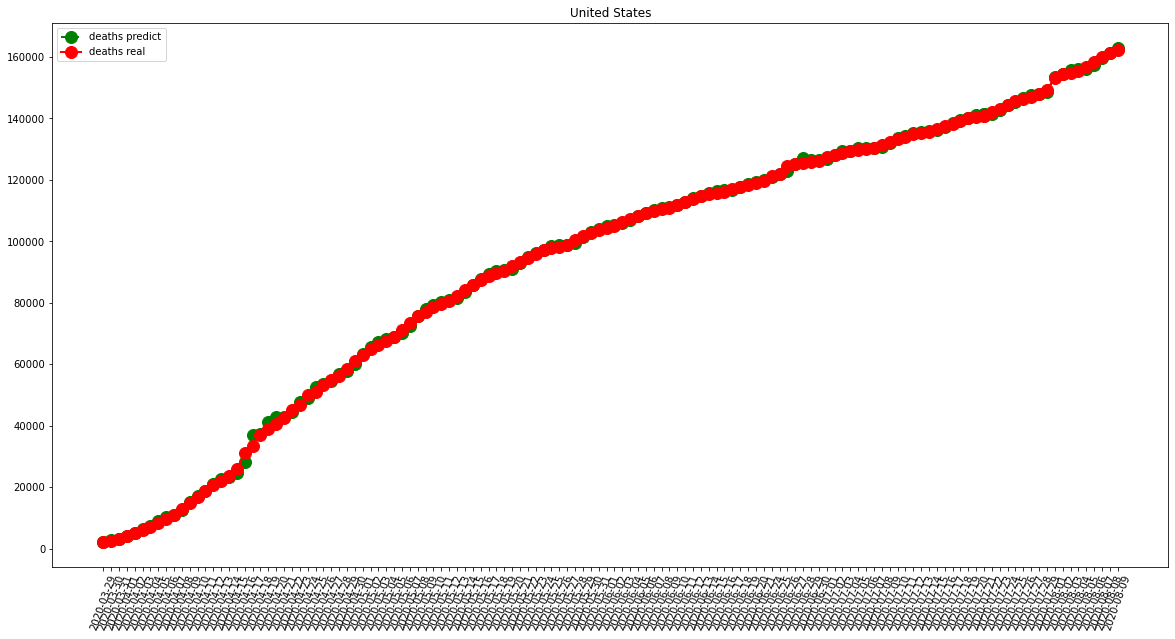

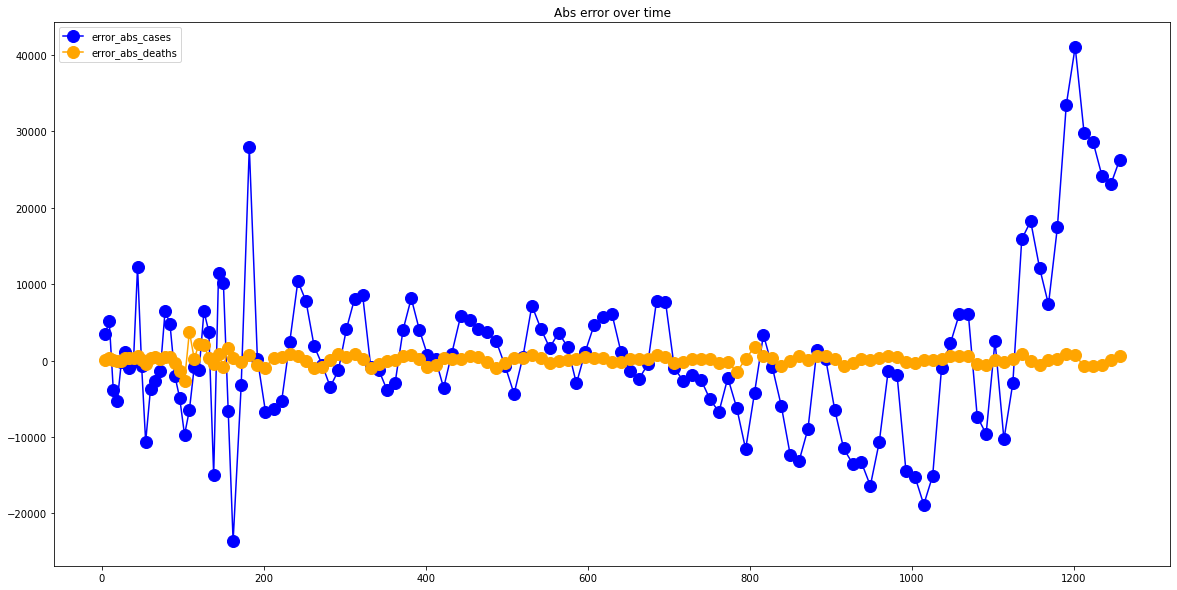

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  74.42748091603053
RMSE =  104.04241648232184
-- China performances for deaths --
MAE =  31.015267175572518
RMSE =  137.17501497293313


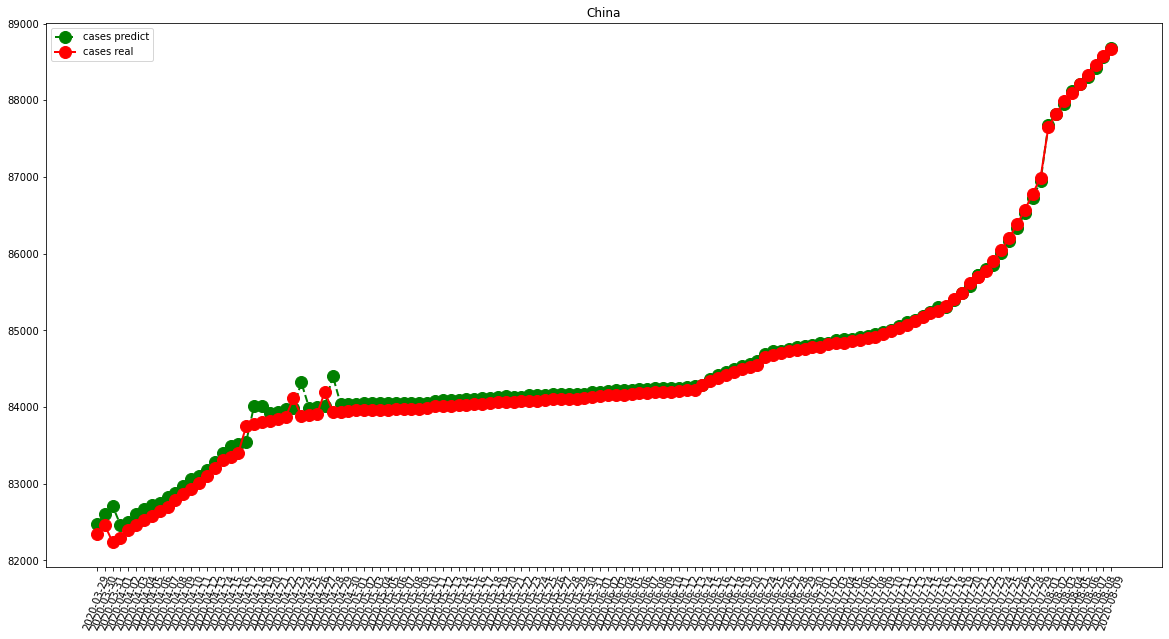

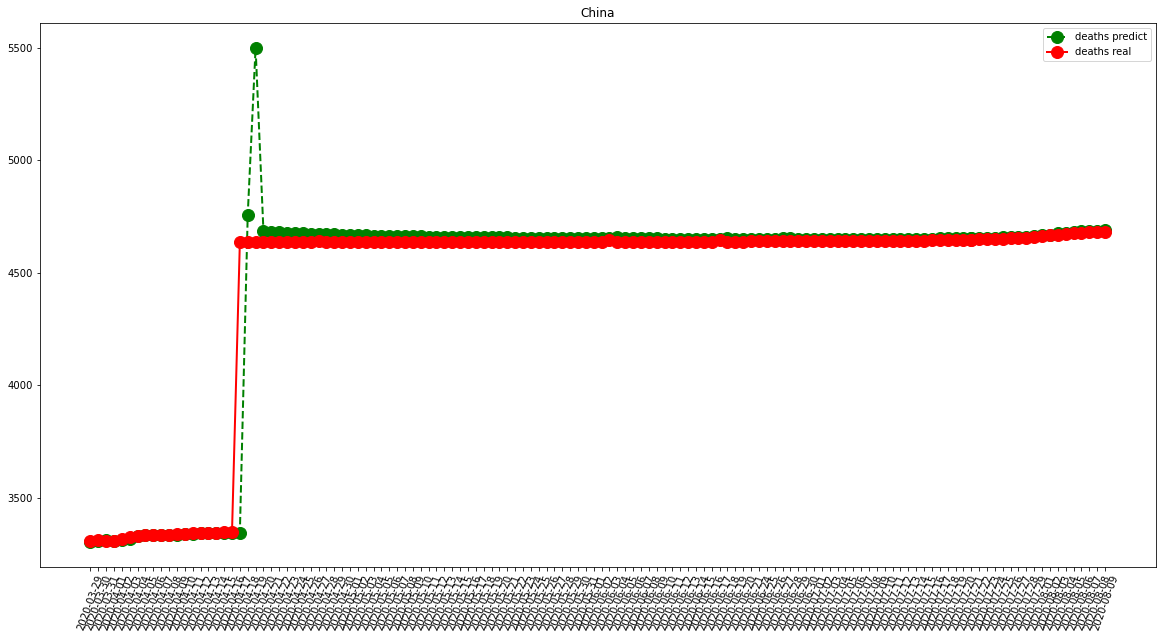

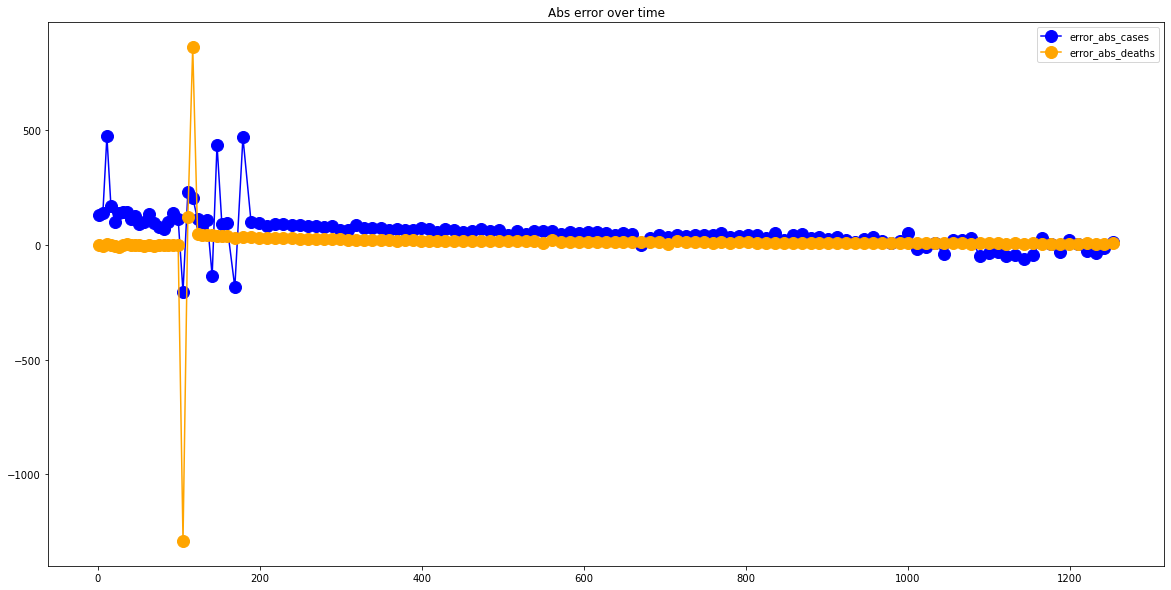

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1206.116504854369
RMSE =  4112.90681465304
-- United Kingdom performances for deaths --
MAE =  189.8640776699029
RMSE =  483.9860785930156


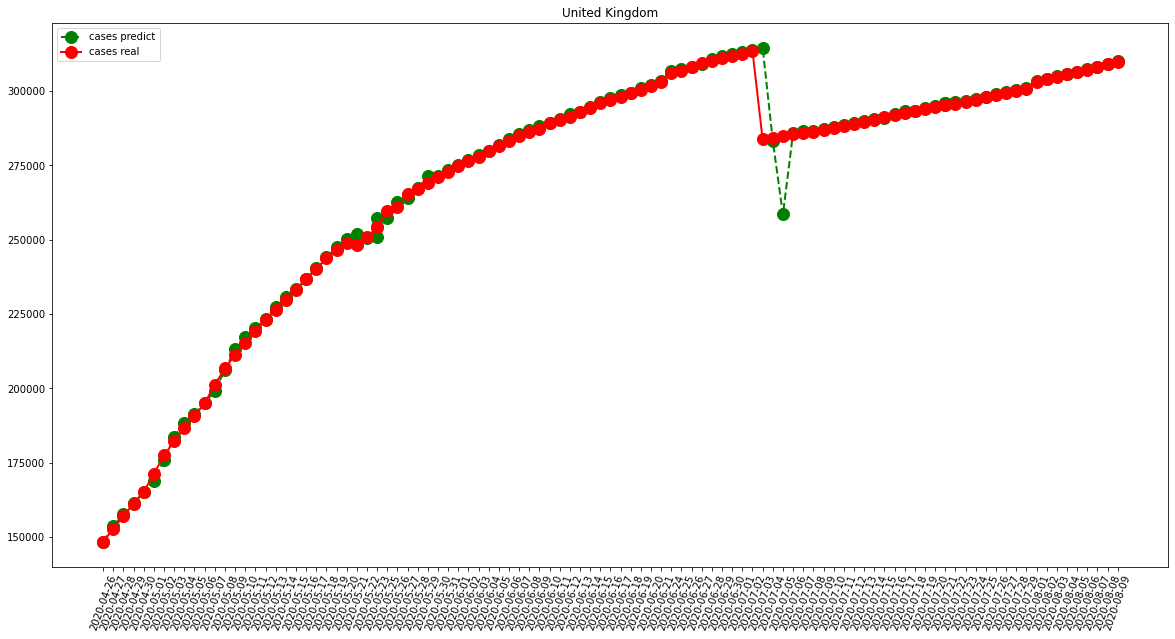

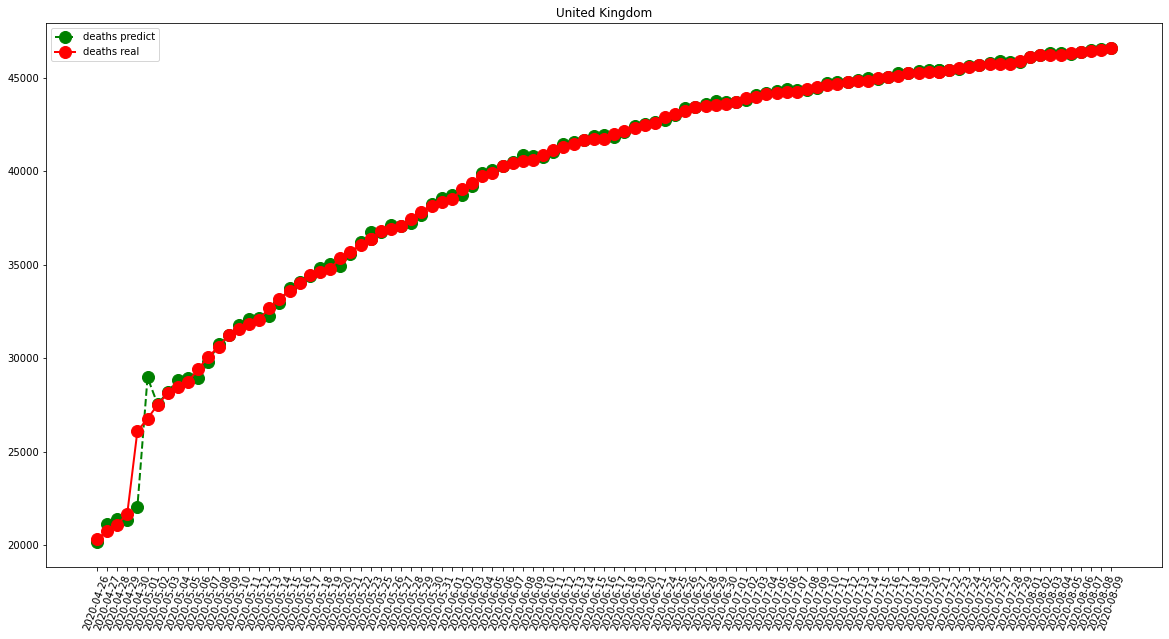

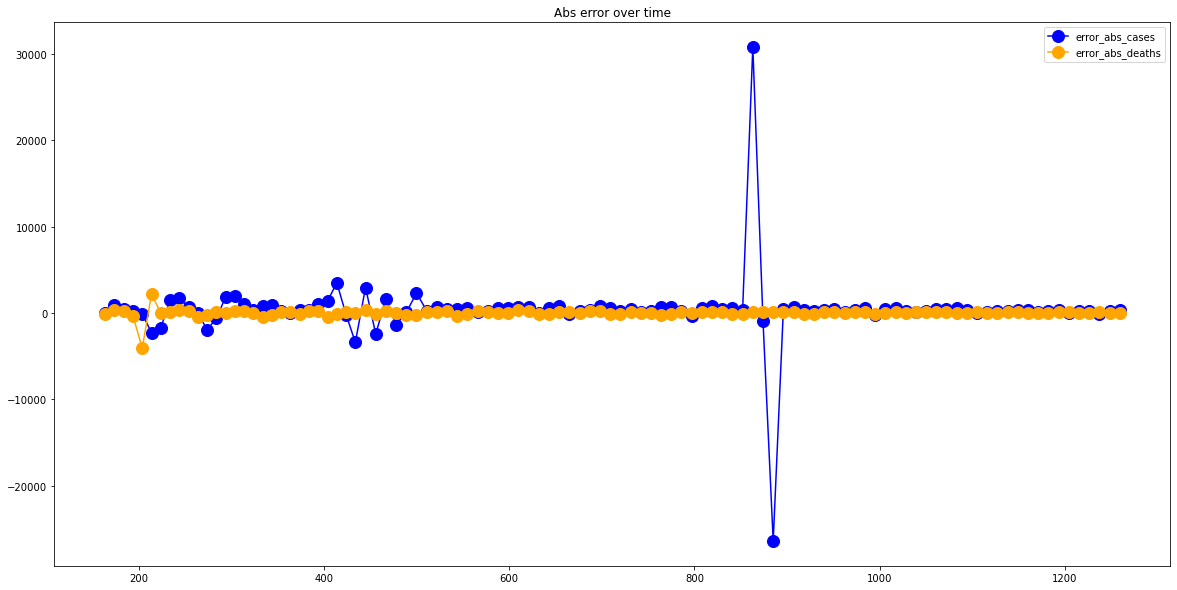

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  314.43689320388347
RMSE =  439.07556242014095
-- Germany performances for deaths --
MAE =  24.019417475728154
RMSE =  43.1553976869008


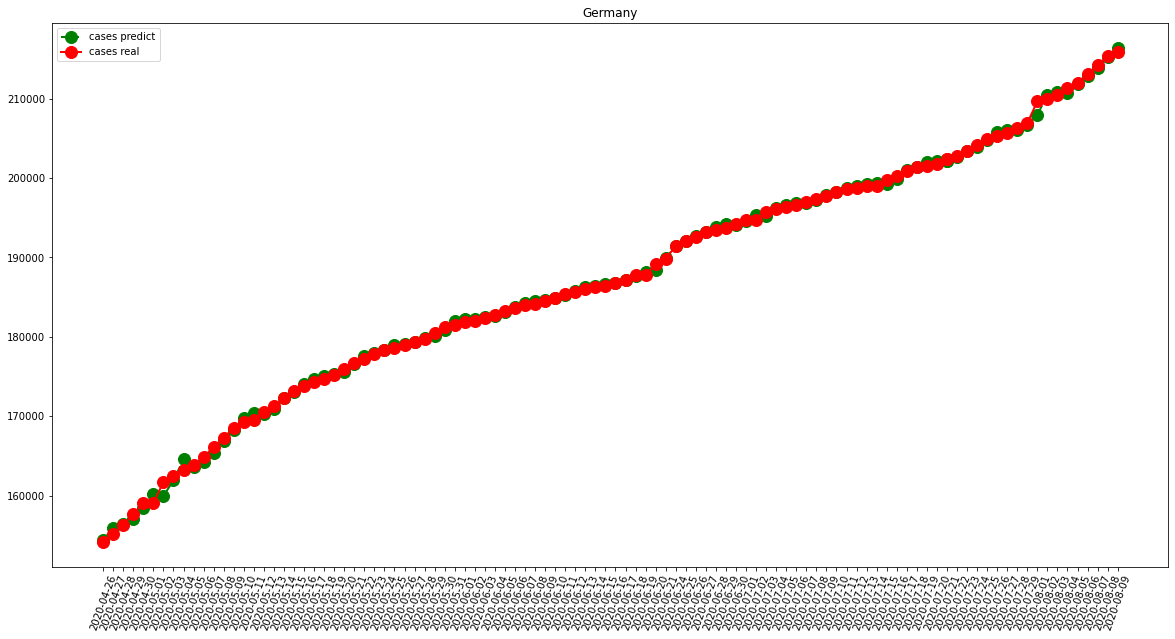

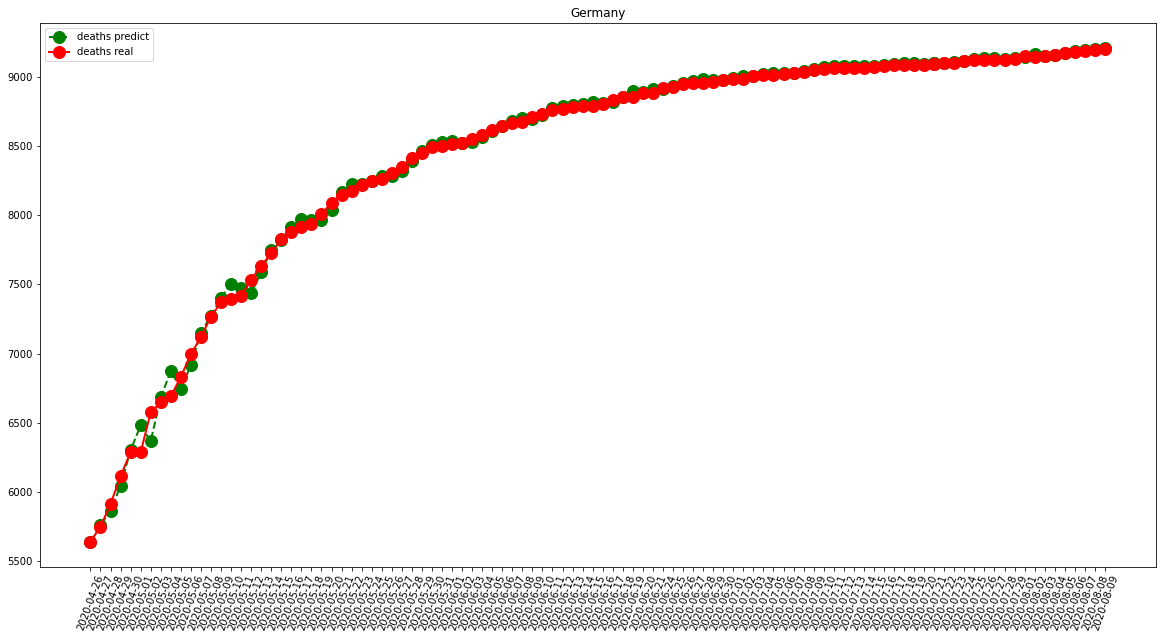

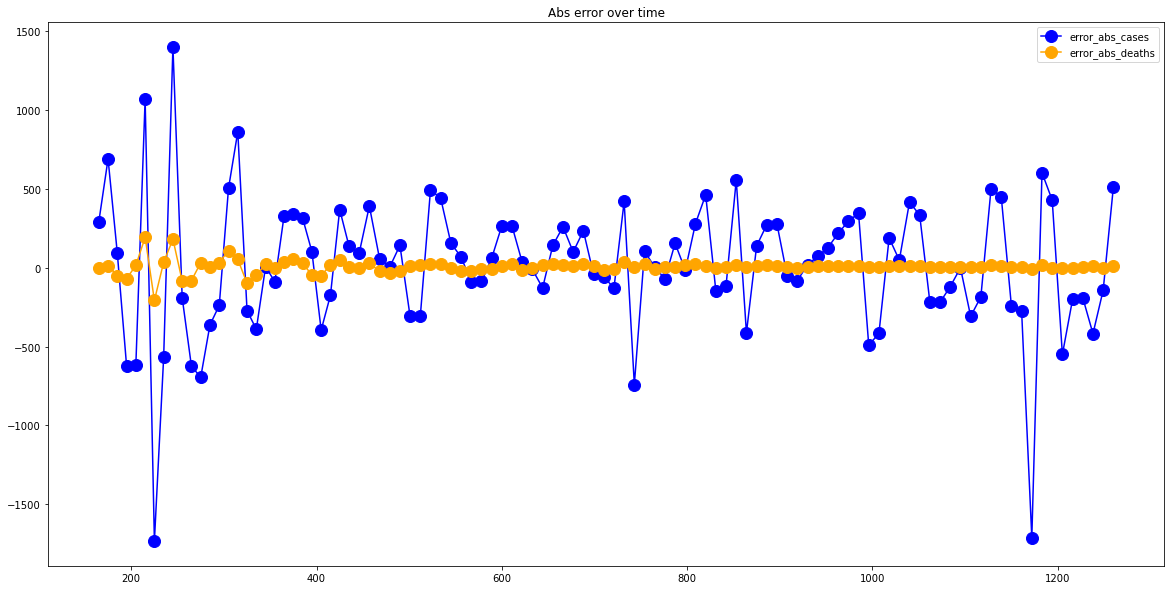

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  588.5825242718447
RMSE =  890.0495895424368
-- Iran performances for deaths --
MAE =  31.815533980582526
RMSE =  70.32400741864386


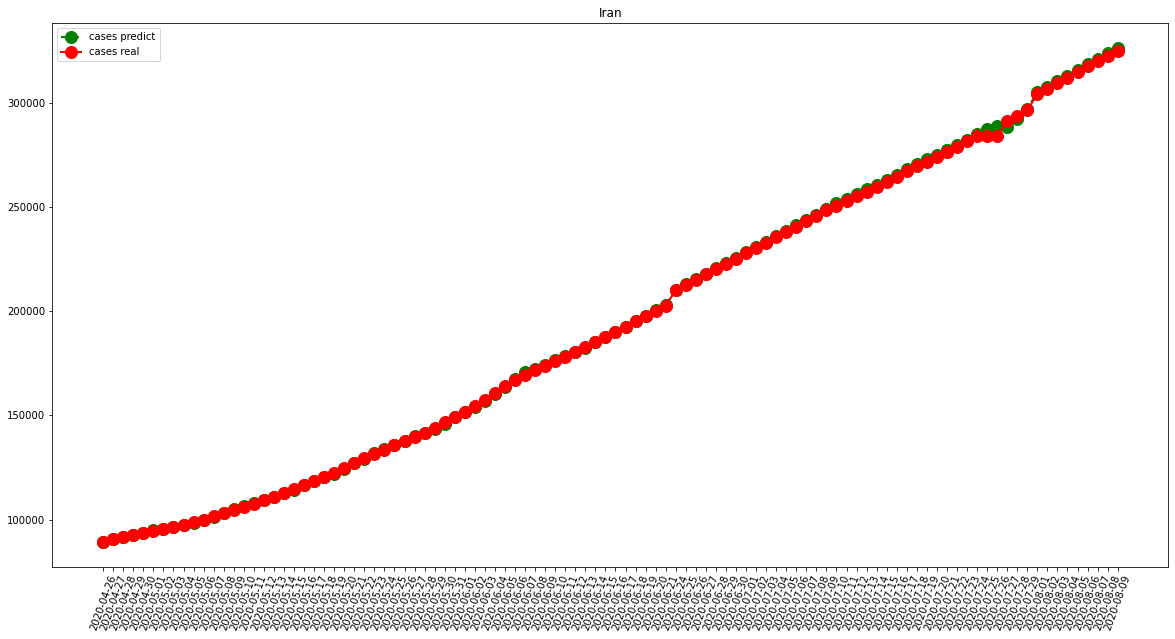

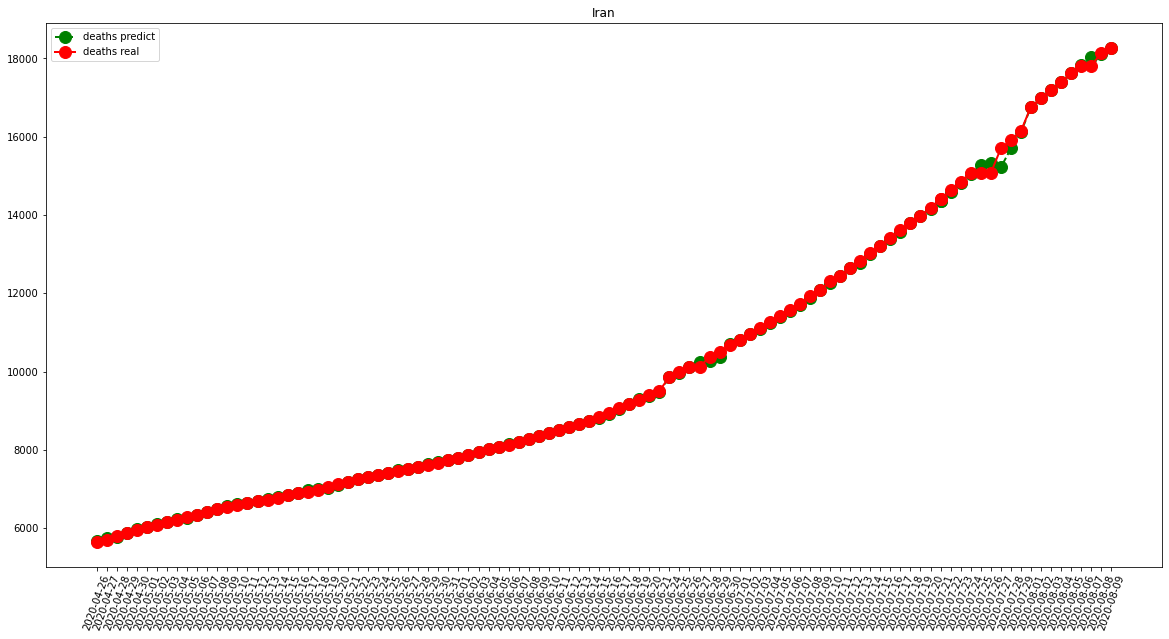

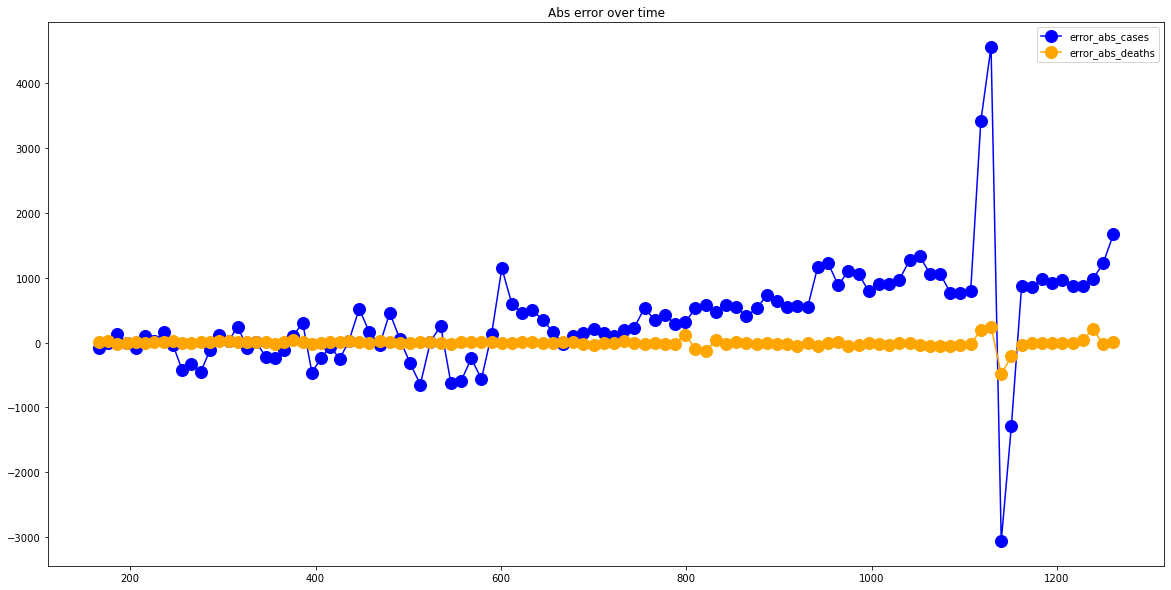

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  199.53398058252426
RMSE =  341.4271873648094
-- Turkey performances for deaths --
MAE =  18.49514563106796
RMSE =  100.02257026844889


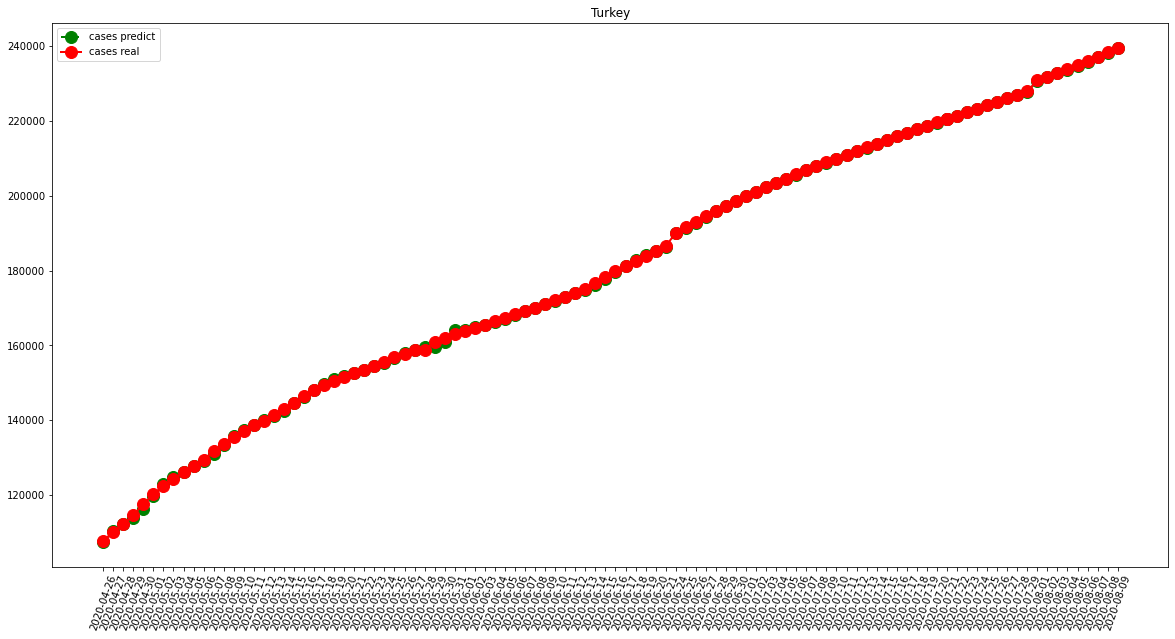

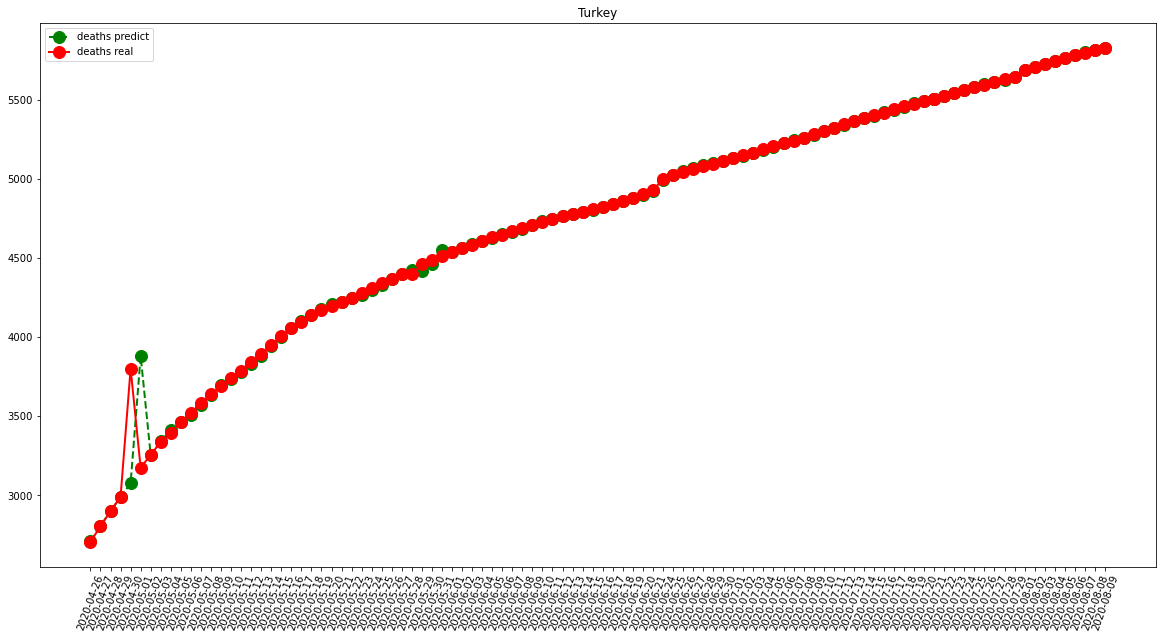

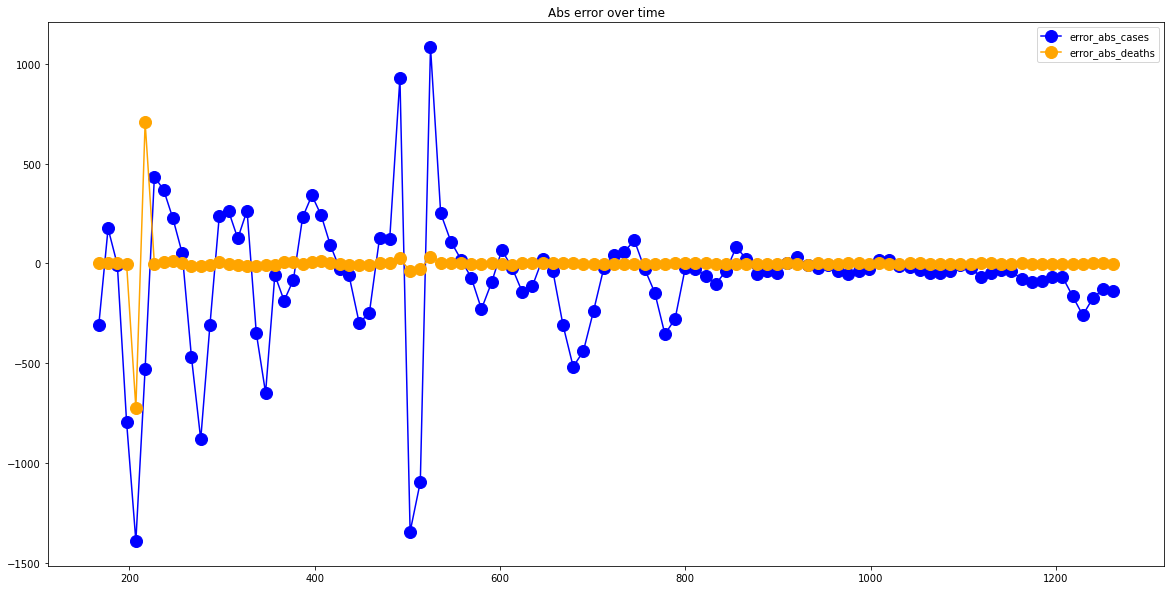

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11963.105263157895
RMSE =  15883.910133577909
-- Brazil performances for deaths --
MAE =  401.9605263157895
RMSE =  492.7189734951408


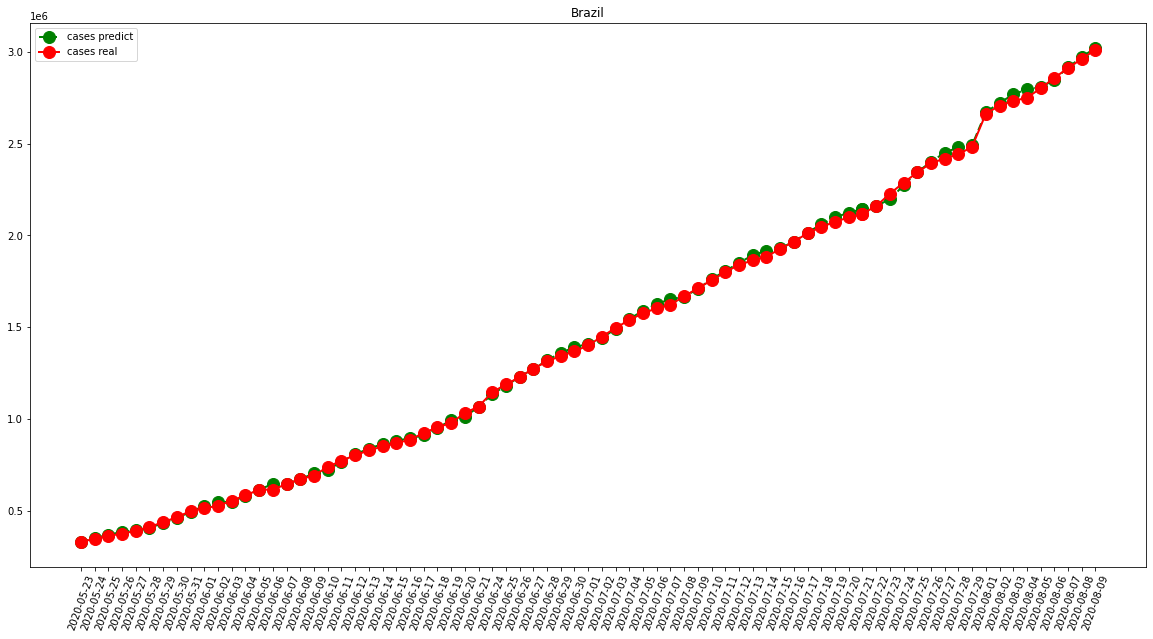

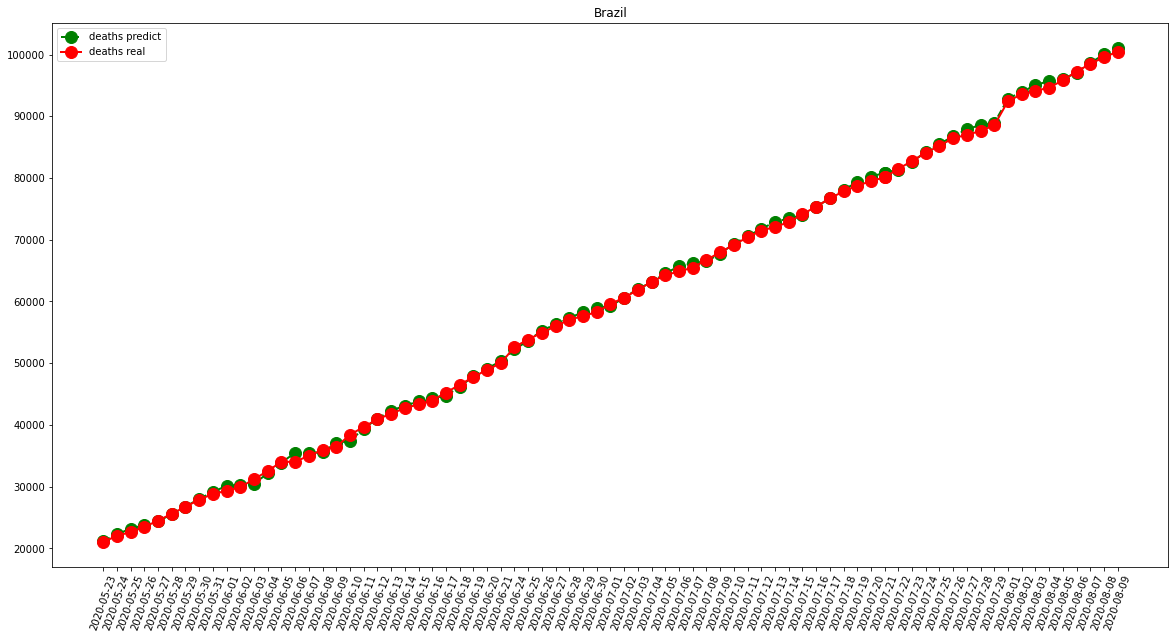

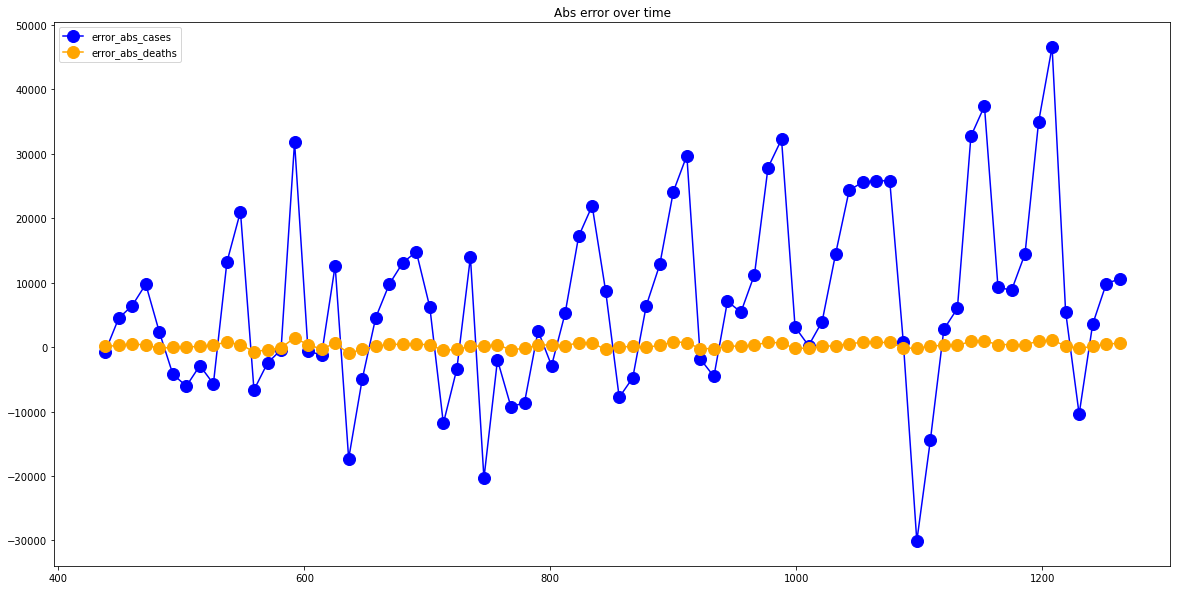

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)